## Importing necessary libraries

In [1]:
!pip install wikipedia

In [2]:
from sklearn.linear_model import LinearRegression,Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wikipedia

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
df=pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\baseball.csv")
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Exploratory Data Analysis

In [4]:
df.shape

(30, 17)

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above statements, we can arrive at the following inferences:
1. There are 30 rows and 17 columns in the dataset - 16 features which contribute to predicting the label(wins - W)
2. There are no null columns and no categorical columns in the dataset. All columns are continuous.

Also, from the problem statement, we know that the features are as follows

 R - Runs
 W - Walks
 SO - Strikeouts  
 AB - At Bats   
 H - Hits          
 2B - Doubles            
 3B - Triples                   
 HR - Homeruns                    
 RA - Runs Allowed          
 ER - Earned Runs        
 ERA - Earned Run Average       
 SHO - Shutouts                   
 CG - Complete Games        
 E - Errors                     
 SV - Saves                       
 BB - Stolen bases


    

#### Lets try and understand a little more about these terms

In [7]:
#using wikipedia in order to scrape details
import wikipedia as wiki

features = 'Runs in baseball,Walks in baseball,Strikeouts in baseball,At Bats in baseball,Hits in baseball,Doubles in baseball,Triples in baseball,Home-runs in baseball,Runs Allowed in baseball,Earned Runs in baseball,Earned Run Average in baseball,Shutouts in baseball,Stolen Bases in baseball,Errors in baseball'.split(',')

#Creating empty dictionaty for storing the meanings of the terms
terms_details = []

for i in features:
    
        terms_details.append(wiki.summary(i))
        terms_details.append("--------------------------------------------------------------------------------------------------------------------------")
         
terms_details


['In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home. The object of the game is for a team to score more runs than its opponent.\nThe Official Baseball Rules hold that if the third out of an inning is a force out of a runner advancing to any base then, even if another baserunner crosses home plate before that force out is made, his run does not count. However, if the third out is not a force out, but a tag out, then if that other baserunner crosses home plate before that tag out is made, his run will count. In baseball statistics, a player who advances around all the bases to score is credited 

In [8]:
df.nunique() 

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
df.columns = 'Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,Earned_Run_Average(ERA),CompleteGames,Shutouts,Saves,Errors'.split(',')
    

In [10]:
df.head(10)

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,Earned_Run_Average(ERA),CompleteGames,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [11]:
df.shape

(30, 17)

In [12]:
#Function to print the distribution plot for all the columns in the dataset

def dist_plot(col):
 
    sns.distplot(df[col])
    plt.xlabel(col.title())
    plt.ylabel('Number of samples')
    plt.title("Details of "+col.title())
    plt.show()

In [13]:
all_features = df.columns[1:]

In [14]:
all_features

Index(['Runs', 'AtBats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'StolenBases', 'RunsAllowed', 'EarnedRuns',
       'Earned_Run_Average(ERA)', 'CompleteGames', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

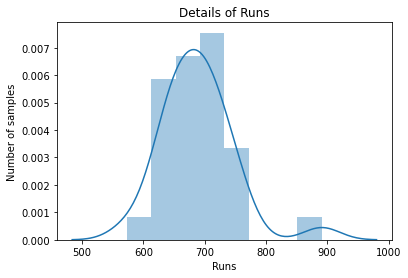

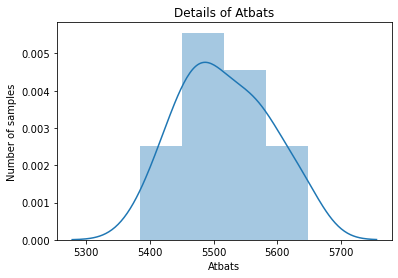

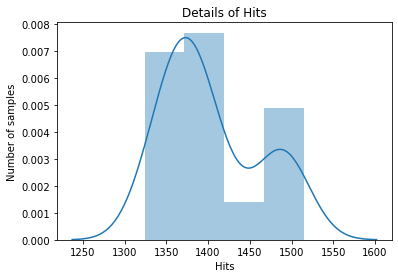

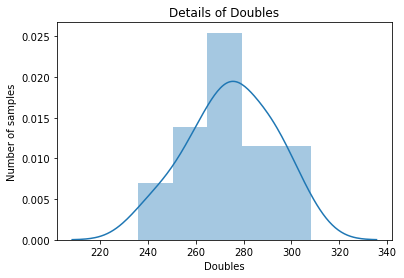

In [15]:
for i in all_features[:4]:
    dist_plot(i)

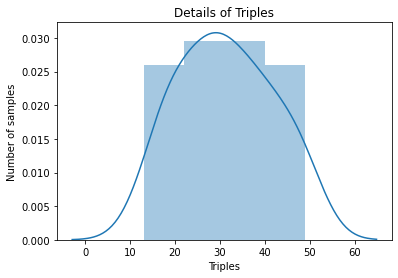

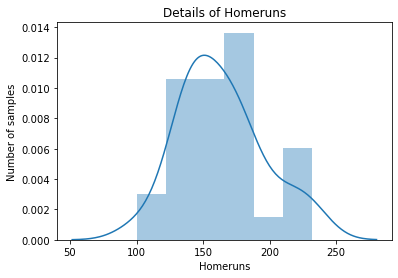

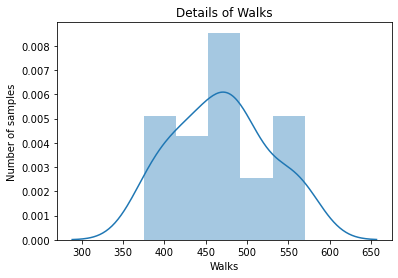

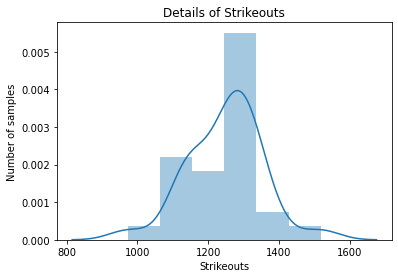

In [16]:
for i in all_features[4:8]:
    dist_plot(i)

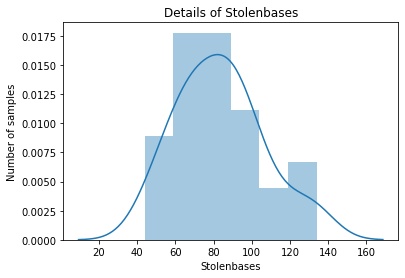

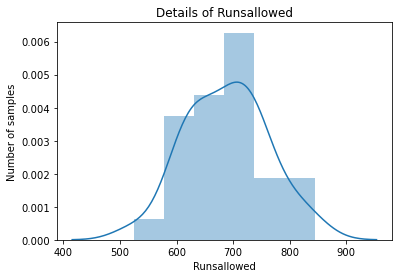

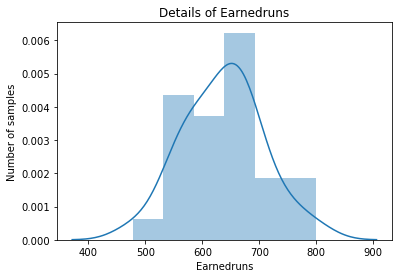

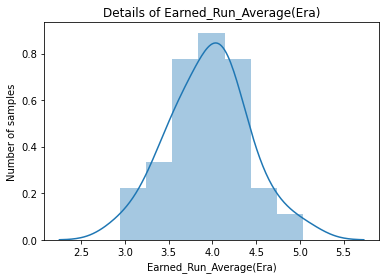

In [17]:
for i in all_features[8:12]:
    dist_plot(i)

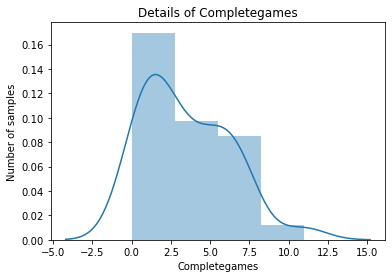

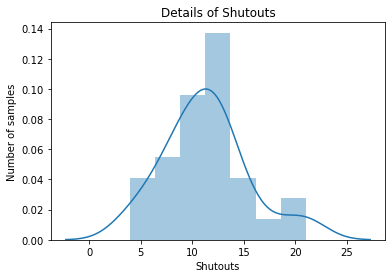

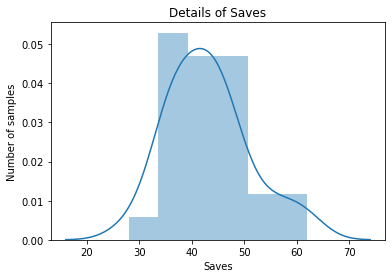

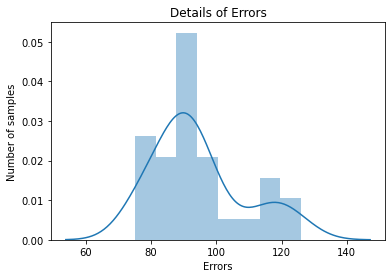

In [18]:
for i in all_features[12:16]:
    dist_plot(i)

## Two Variable Analysis - Correlation Matrix 

In [19]:
#Finding correlation between variables
df.corr()

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,Earned_Run_Average(ERA),CompleteGames,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AtBats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
StolenBases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


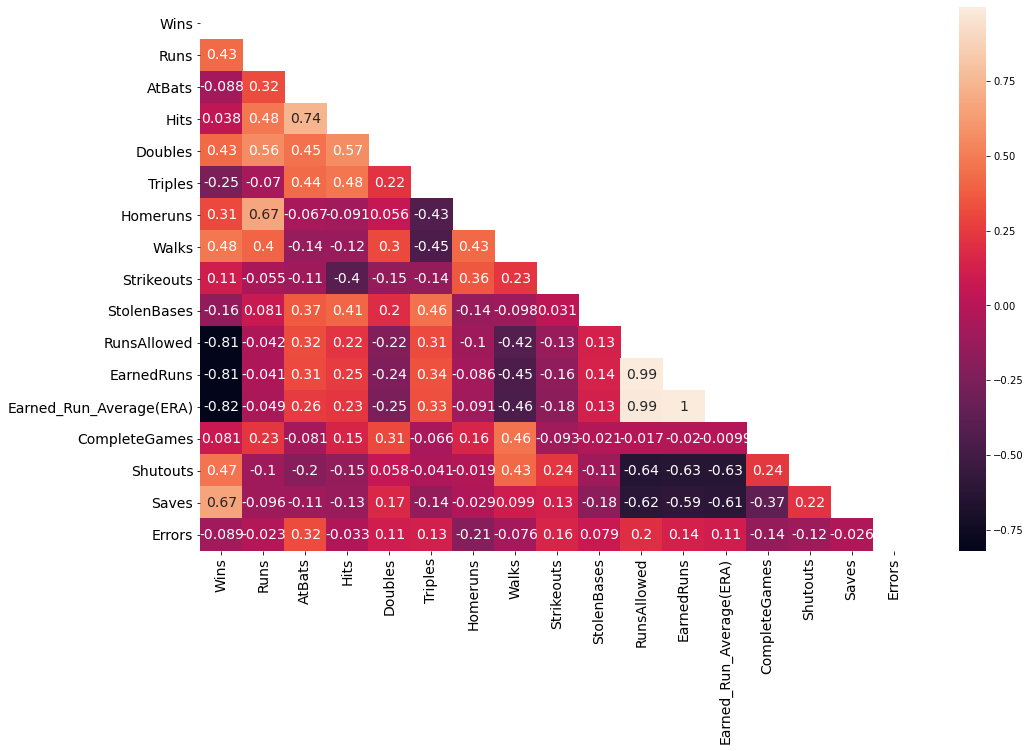

In [20]:
#creates an array of zeros
zeromask = np.zeros_like(df.corr()) 

triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=zeromask, annot=True, annot_kws={'size': 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Wins has a very strong negative co-relation with Stolen Bases, Earned runs and Earned run average. Earned run average and earned

Suggestions

    1. We have very less number of samples and there are so many features in the data. This causes overfitting as the model is prone to have very high variance. 
    2. Since we cannot add more data, maybe we will try to reduce some of the features to address the variance of the model.
   

#### Outlier removal

#### Checking for skewness

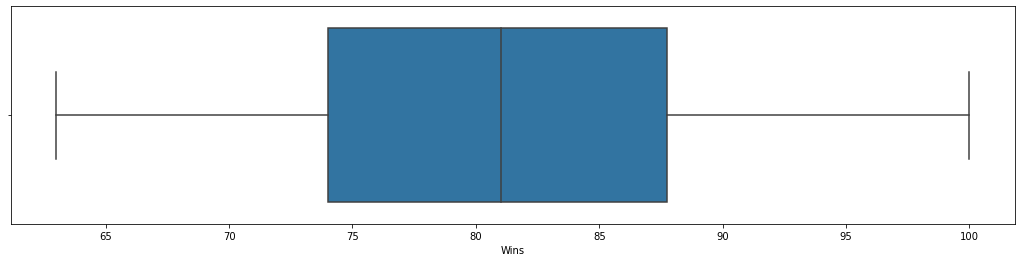

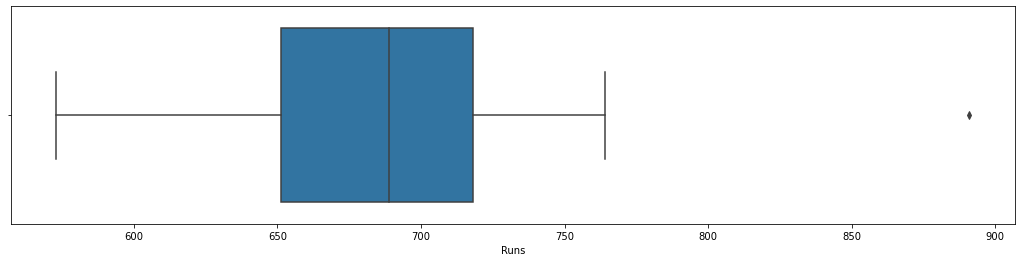

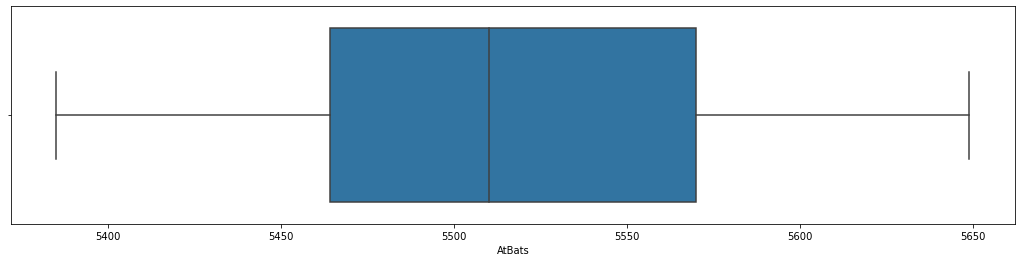

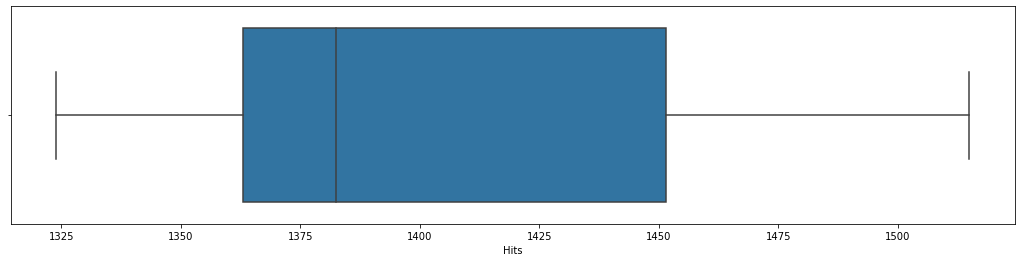

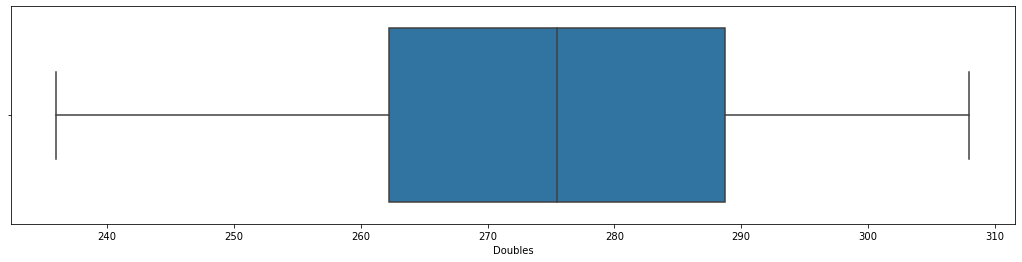

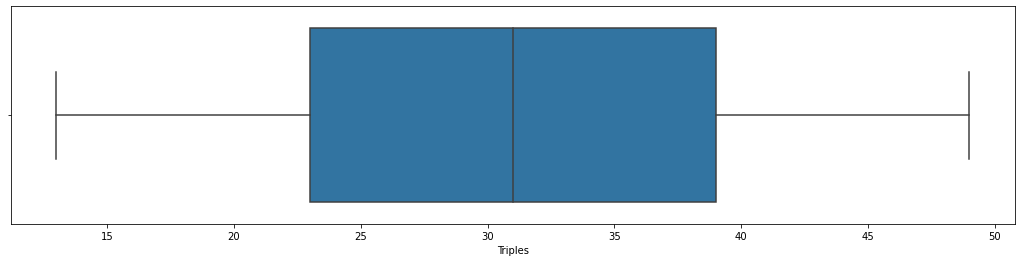

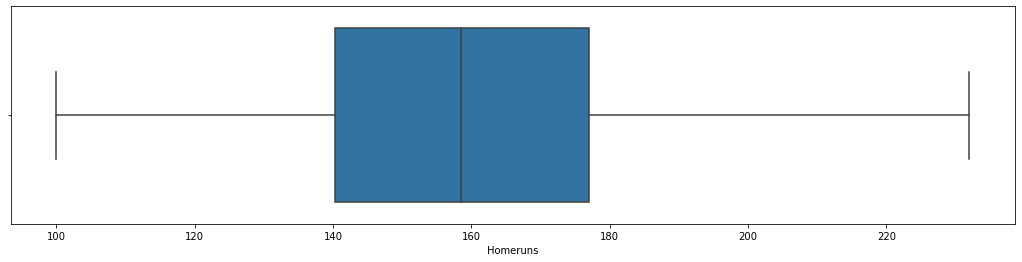

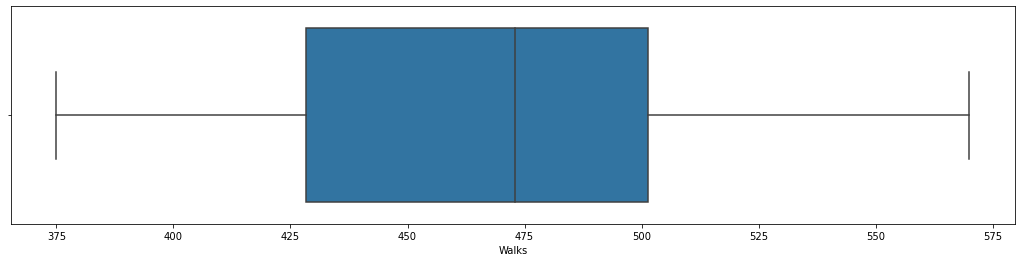

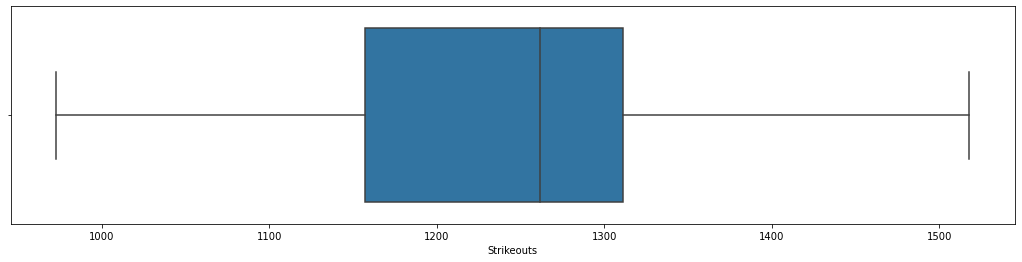

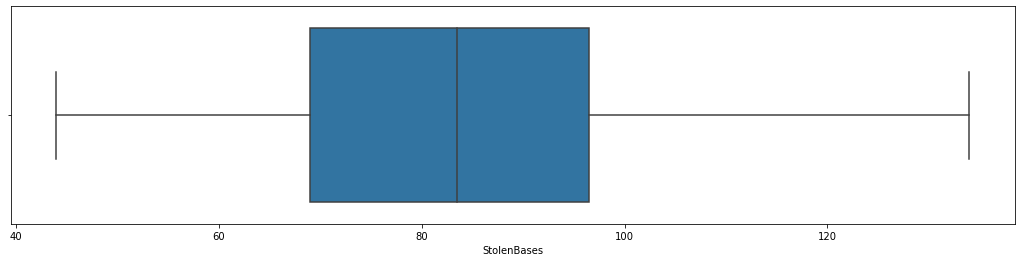

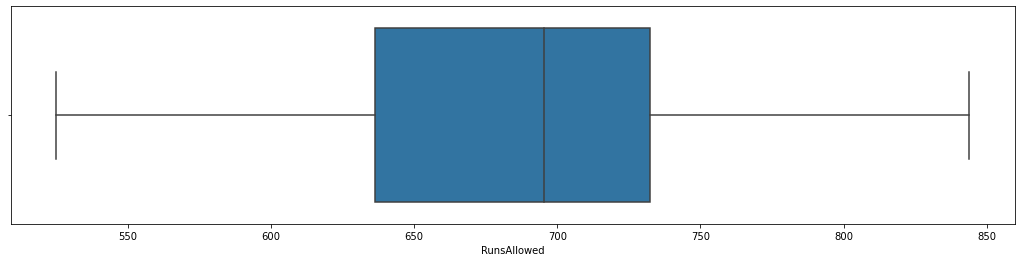

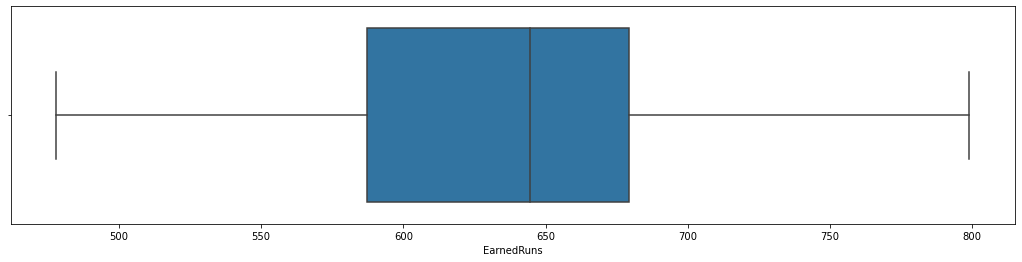

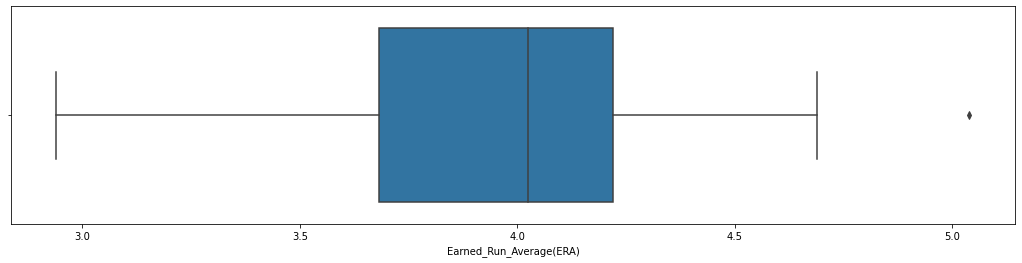

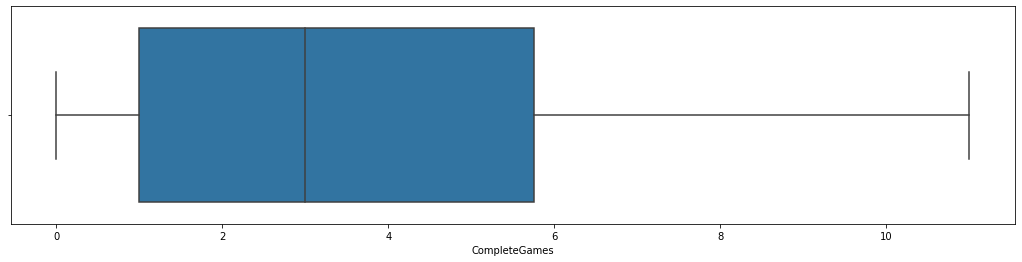

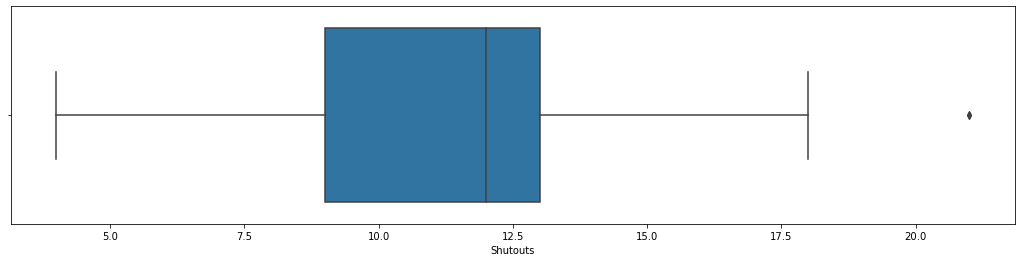

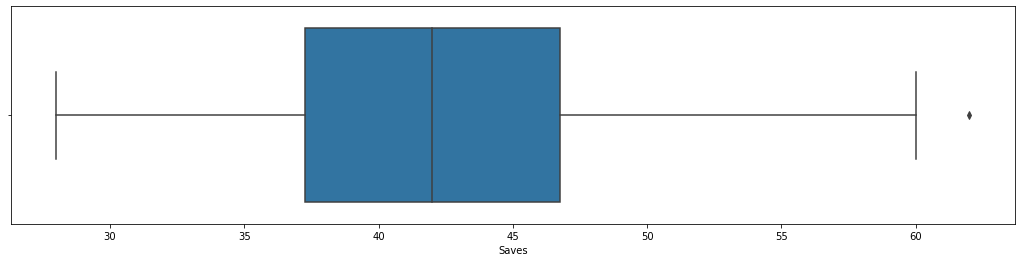

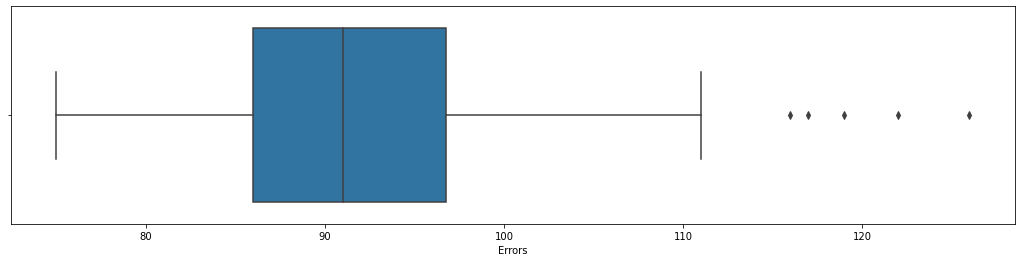

In [21]:
for col in df:
    plt.figure(figsize=(18,4))
    sns.boxplot(df[col])
    plt.show()

In [22]:
# addressing outliers using the IQR:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

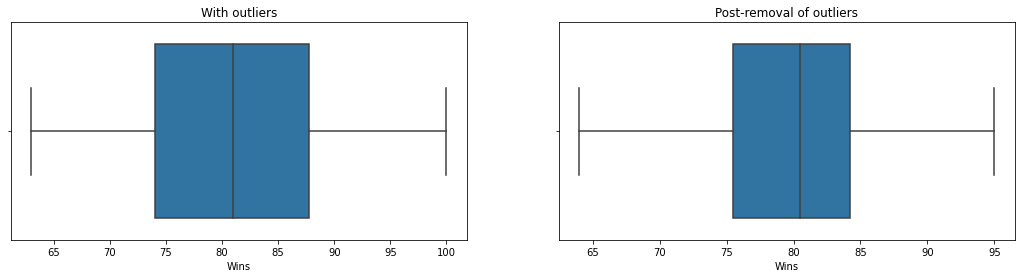

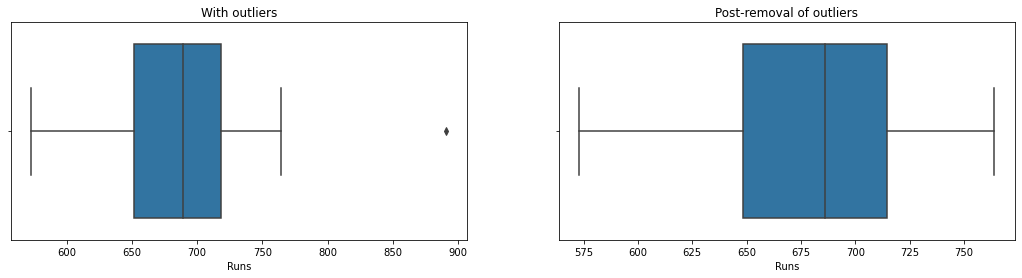

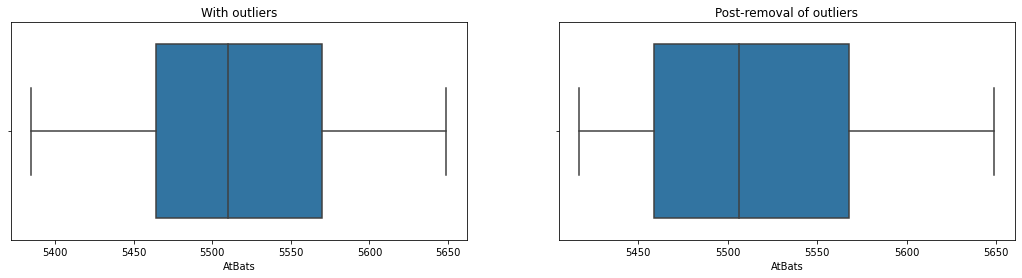

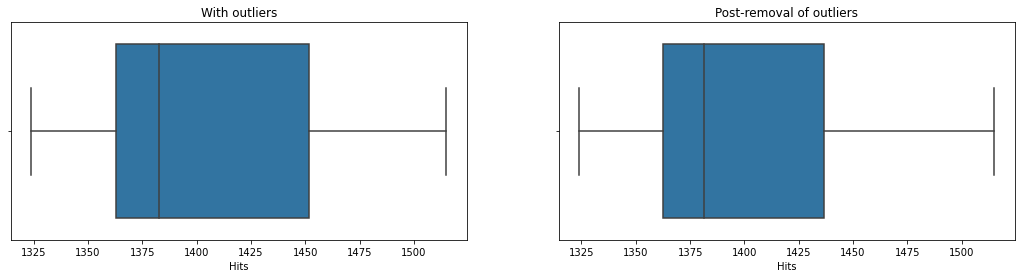

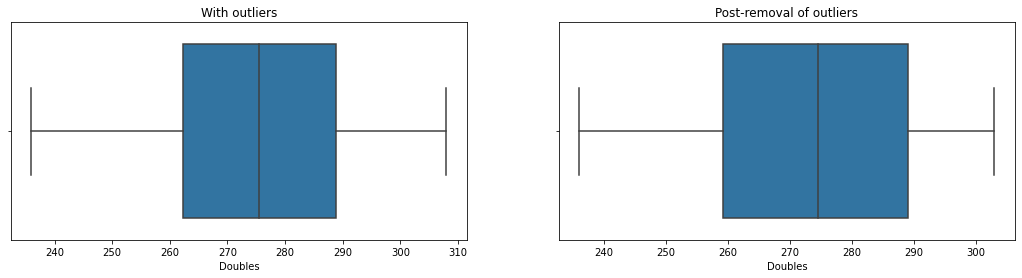

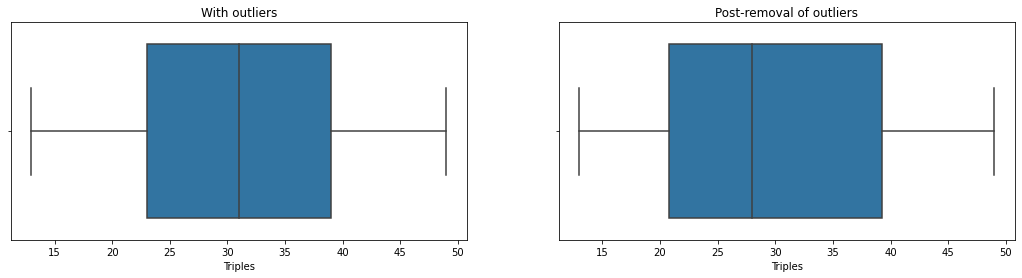

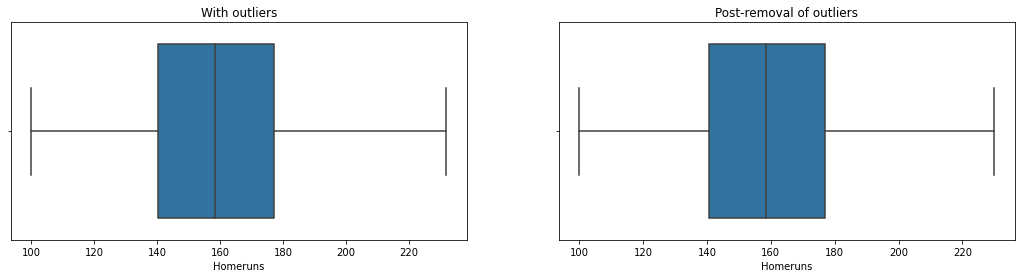

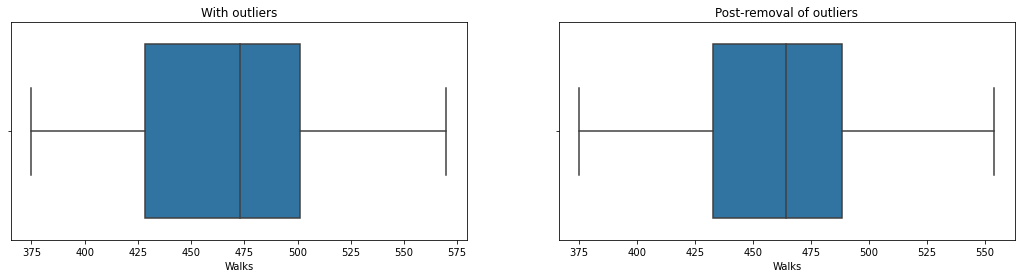

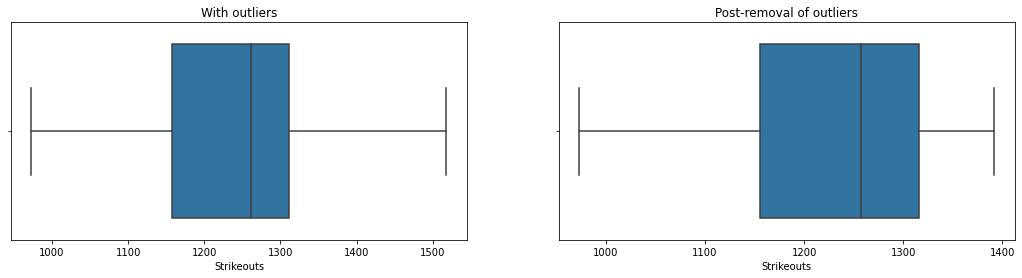

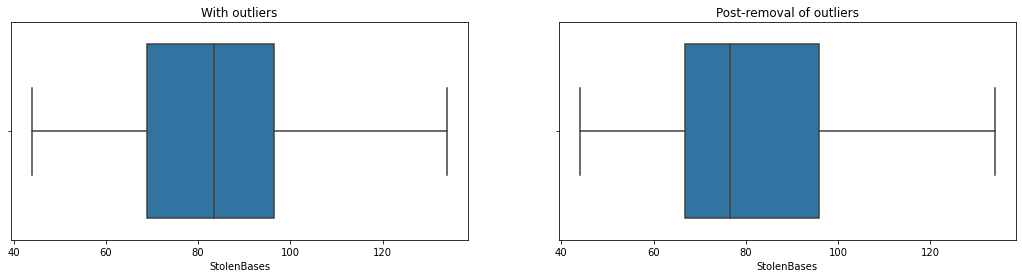

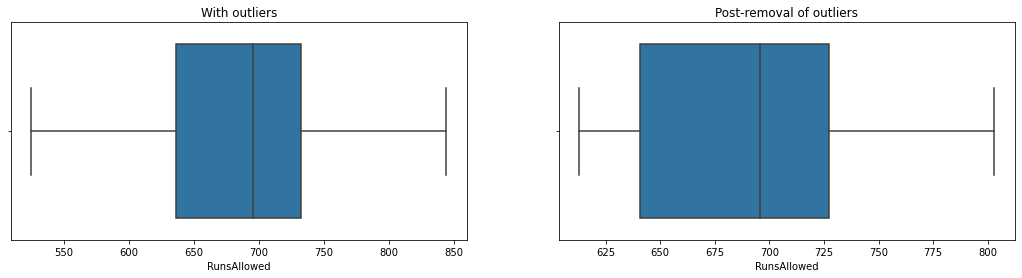

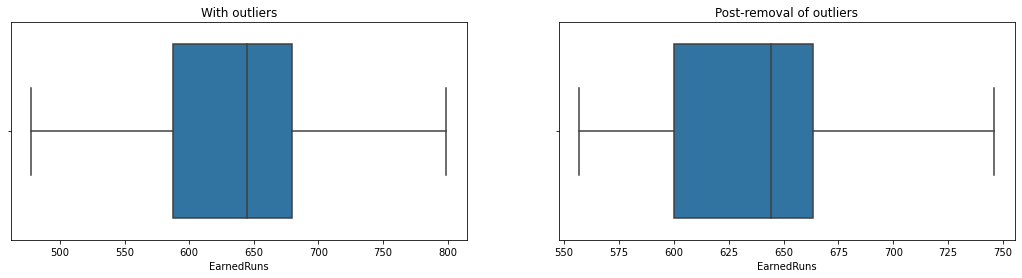

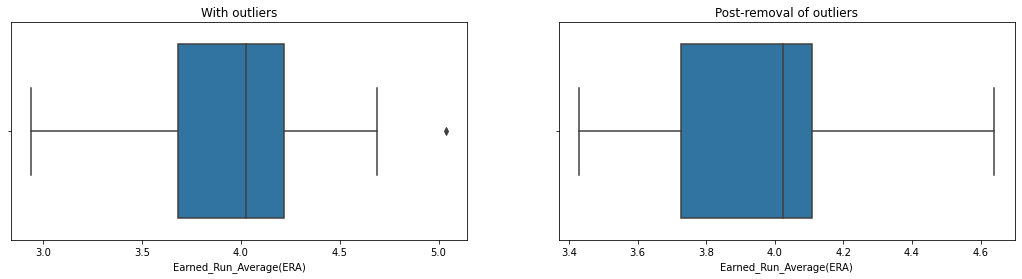

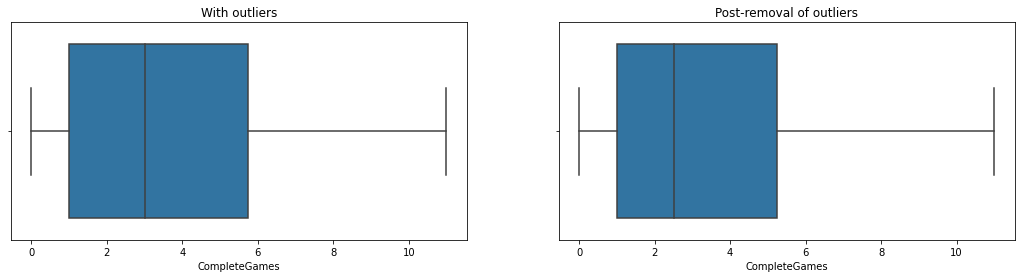

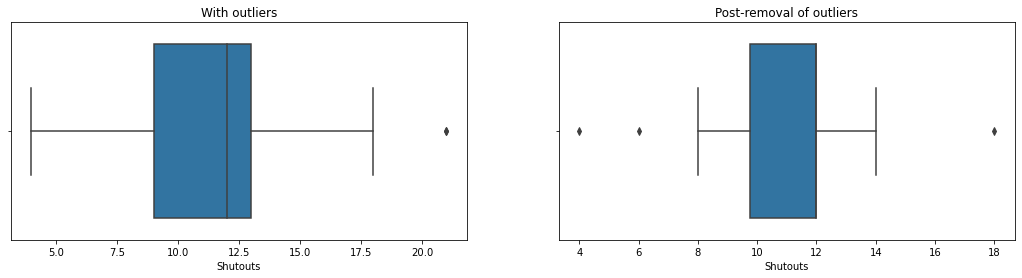

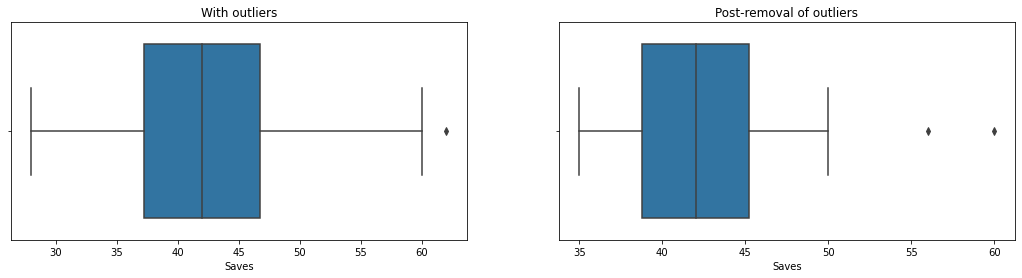

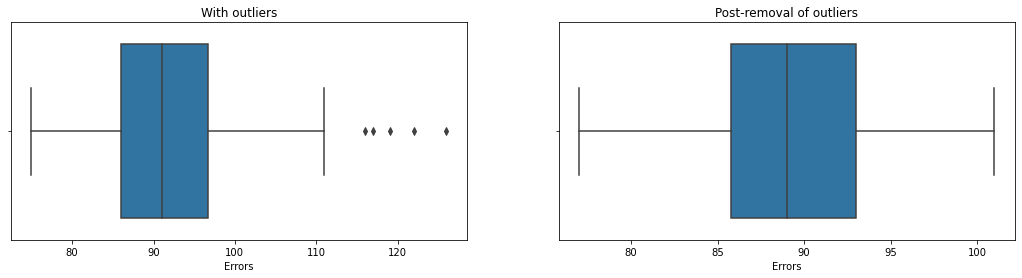

In [23]:
for col in df:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('Post-removal of outliers')

In [24]:
df_cleaned.shape

(20, 17)

In [25]:
#let's check the skewness of the features in the dataset:
df_cleaned.skew()

Wins                      -0.194773
Runs                      -0.316726
AtBats                     0.345887
Hits                       0.817990
Doubles                   -0.149289
Triples                    0.268007
Homeruns                   0.360341
Walks                      0.079234
Strikeouts                -0.791526
StolenBases                0.639024
RunsAllowed                0.304559
EarnedRuns                 0.213161
Earned_Run_Average(ERA)    0.218418
CompleteGames              1.082534
Shutouts                  -0.135227
Saves                      1.043927
Errors                    -0.243990
dtype: float64

If skewness is between -0.5 and 0.5, the distribution is almost symmetric. Since there are few columns beyond that range, let us try to apply log transformation to get rid of the skewness

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_transformed = pt.fit_transform(df_cleaned)
df_final = pd.DataFrame(df_transformed, columns=df_cleaned.columns)

In [27]:
df_final.skew()

Wins                      -0.011787
Runs                      -0.038045
AtBats                     0.000000
Hits                       0.000000
Doubles                   -0.057611
Triples                   -0.049845
Homeruns                  -0.003702
Walks                     -0.013838
Strikeouts                -0.112317
StolenBases                0.012717
RunsAllowed                0.000000
EarnedRuns                 0.000000
Earned_Run_Average(ERA)    0.006336
CompleteGames             -0.020258
Shutouts                   0.059966
Saves                      0.057785
Errors                    -0.037752
dtype: float64

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

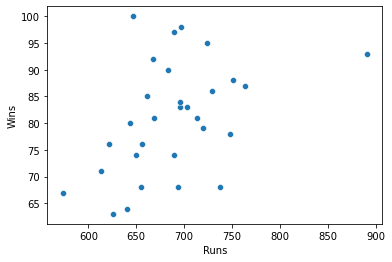

In [28]:
# Wins vs runs
sns.scatterplot(df.Runs,df.Wins)

## Machine learning algorithms

In [29]:
# Split the features and the target variables into X and y respectively.
X = df_final.drop('Wins',1)
y = df_final['Wins']

In [30]:
# train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)

In [31]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

#### Linear regression

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [33]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 71.50565995092953
MAE: 0.4140275709989491
MSE: 0.34983853597417275
RMSE: 0.5914715005595559


#### Ridge

In [34]:
rdg = Ridge(alpha=0.001)
rdg.fit(x_train,y_train)
pred=rdg.predict(x_test)

In [35]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 71.52213831938926
MAE: 0.413981853612877
MSE: 0.3496362232240874
RMSE: 0.5913004508911586


#### Decision tree

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [37]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : -77.1641740225139
MAE: 1.3285171987381525
MSE: 2.1751286452107763
RMSE: 1.4748317345415294


#### Random Forest Regressor

In [38]:
rfr =  RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [39]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 9.994130595342343
MAE: 0.8358554832429542
MSE: 1.1050447747651972
RMSE: 1.0512110990496615


#### Adaboost Regressor

In [40]:
adtr = AdaBoostRegressor()
adtr.fit(x_train,y_train)
pred=adtr.predict(x_test)

In [41]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 5.613643412698743
MAE: 0.870015512051773
MSE: 1.1588260948515932
RMSE: 1.0764878516971723


#### KNN Regressor

In [42]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)

In [43]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 4.960323866150329
MAE: 0.7816198222602486
MSE: 1.1668472089849335
RMSE: 1.0802070213551351


#### Support Vector Regressor

In [44]:
svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)

In [45]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 75.45636276641578
MAE: 0.4052487496178695
MSE: 0.301333882535679
RMSE: 0.5489388695799187


#### ADA Boost Regressor with Linear Regression

In [46]:
adasp = AdaBoostRegressor(base_estimator=LinearRegression())
adasp.fit(x_train,y_train)
pred=adasp.predict(x_test)

In [47]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 79.28013354268734
MAE: 0.4089880215246783
MSE: 0.254387633983581
RMSE: 0.5043685497566051


In [48]:
models = [LinearRegression(),Ridge(alpha=0.001),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()
          ,KNeighborsRegressor(),SVR(kernel='linear'),AdaBoostRegressor(base_estimator=LinearRegression())]

model_names = 'Linear_Regression#Ridge#Decision_Tree_Regressor#Random_Forest_Regressor#Descision_Tree_Regressor#KNNeighbor_Regressor#Support_Vector_Regressor#AdaBoost_Regressor'.split("#")

#initializing a new dataframe in order to upload the metric scores and compare for best model
dfmodels = pd.DataFrame(columns=['Model','R2','MSE','meanCV'])

#writing all the model with scores into the Dataframe 
for i,j in zip(models,model_names):
    
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    mse = mean_squared_error(y_test,ypred)
    r2 = r2_score(y_test,ypred)
    avgCV = np.mean(cross_val_score(i,X,y,scoring='r2'))
    
    dfmodels = dfmodels.append({'Model':j,'R2':r2,'MSE':mse,'meanCV':avgCV},ignore_index=True)

In [64]:
dfmodels.sort_values(by='R2', ascending=False, inplace=False, na_position='last')

,Model,R2,MSE,meanCV
7,AdaBoost_Regressor,0.767997,0.284841,0.423930
6,Support_Vector_Regressor,0.754564,0.301334,0.018042
1,Ridge,0.715221,0.349636,-0.322835
0,Linear_Regression,0.715057,0.349839,-0.324808
3,Random_Forest_Regressor,0.112025,1.090210,0.248855
5,KNNeighbor_Regressor,0.049603,1.166847,0.054487
4,Descision_Tree_Regressor,0.028981,1.192166,0.300249
2,Decision_Tree_Regressor,-0.324414,1.626046,-0.125189


#### Conclusions:

    1. Looking at the models, we are able to acertain that AdaBoost_Regressor(with has the highest R2 score and the least MSE. This is closely followed by Support_Vector_Regressor and Ridge based on R2 score
    2. Let us try to improve the accuracy of the algorithm by doing some hyper-parameter tuning

#### Hyper parameter tuning 

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(base_estimator=LinearRegression()),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostRegressor(base_estimator=LinearRegression()),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [51]:
# print best parameter after tuning
print(pre_gs_inst.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(pre_gs_inst.best_estimator_)

{'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.01}
AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01,
                  loss='square')


In [57]:
ada_bm = AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01, n_estimators =50,loss='square')
ada_bm.fit(x_train,y_train)
predada=ada_bm.predict(x_test)

In [58]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, predada))
print('MSE:', metrics.mean_squared_error(y_test, predada))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predada)))

R2 Score : 79.28013354268734
MAE: 0.45260573072344934
MSE: 0.294330083429647
RMSE: 0.5425219658499064


We are able to improve the R2 score despite a slight increase in the MSE. However, we are able to acertain that it is the best model for this problem. Lets save this model

#### Saving the best model

In [59]:
best_model = AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01, n_estimators =50,loss='square')

In [60]:
best_model.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01,
                  loss='square')

In [61]:
# saving the best model
import joblib
joblib.dump(best_model,'Baseball.pkl')

['Baseball.pkl']